In [8]:
import ee
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from topojson import Topology

import agrigee_lite as agl

np.set_printoptions(suppress=True)
np.set_printoptions(precision=2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
ee.Initialize(opt_url="https://earthengine-highvolume.googleapis.com", project="ee-paulagibrim")

In [3]:
gdf = gpd.read_parquet("tests/data/gdf.parquet")

In [4]:
satellite = agl.sat.Sentinel2()

In [6]:
row = gdf.iloc[0]

agl.get.sits(row.geometry, row.start_date, row.end_date, satellite)

,indexnum,s2_doy_0,s2_doy_1,s2_doy_2,s2_doy_3,s2_doy_4,s2_doy_5,s2_doy_6,s2_doy_7,s2_doy_8,...,s2_swir2_45,s2_swir2_46,s2_swir2_47,s2_swir2_48,s2_swir2_49,s2_swir2_50,s2_swir2_51,s2_swir2_52,s2_swir2_53,s2_swir2_54
0,0,1,6,21,26,31,36,41,46,61,...,1949,1971,1820,1931,2102,1965,2167,1795,1803,1853


In [ ]:
agl.get.sits()

In [7]:
gdf = agl.quadtree_clustering(gdf)

In [ ]:
gdf[gdf.cluster_id==10][0:1].plot()

In [44]:
topo = Topology(gdf[gdf.cluster_id==100], prequantize=False)
topo = topo.toposimplify(0.001, prevent_oversimplify=True)
simple_gdf = topo.to_gdf()

<Axes: >

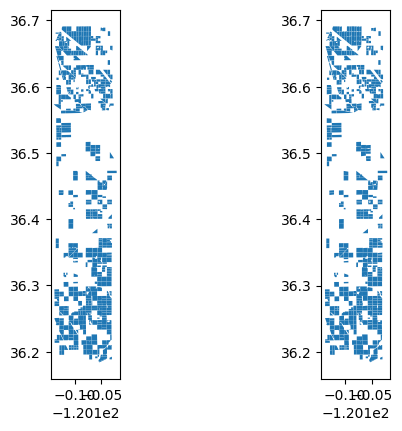

In [45]:
_, ax = plt.subplots(1,2)

gdf[gdf.cluster_id==100].plot(ax=ax[0])
simple_gdf.plot(ax=ax[1])

<Axes: >

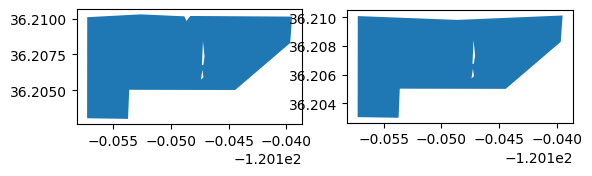

In [46]:
_, ax = plt.subplots(1,2)

gdf[gdf.cluster_id==100][0:1].plot(ax=ax[0])
simple_gdf[0:1].plot(ax=ax[1])

In [47]:
gdf[gdf.cluster_id==100][0:1].to_crs("EPSG:3857").area/10000

12   138.01
dtype: float64

In [48]:
gdf[gdf.cluster_id==100].geometry.astype(str).apply(len).sum(), simple_gdf.geometry.astype(str).apply(len).sum()

(np.int64(97103), np.int64(83762))

np.int64(83762)

In [ ]:
simplified_gdf[0:1].plot()

In [ ]:
gdf[gdf.cluster_id==10].geometry.astype(str).apply(len)

In [ ]:
simplified_gdf.geometry.astype(str).apply(len)

In [ ]:
satellite = agl.sat.Sentinel2()

In [ ]:
agl.get.multiple_sits_chunks_gdrive(gdf, satellite)

In [ ]:
from agrigee_lite.misc import create_gdf_hash

In [ ]:
hashname = create_gdf_hash(gdf)

In [ ]:
satellite = agl.sat.Sentinel2(use_sr=True, selected_bands=["red", "green", "blue"])

In [ ]:
for cluster_id in sorted(gdf.cluster_id.unique()):
    cluster_id = int(cluster_id)
    agl.get.multiple_sits_task_gdrive(gdf[gdf.cluster_id == cluster_id], satellite, f"{hashname}_{cluster_id}", f"agl_mateus_multiple_sits_{hashname}_{cluster_id}")

    if cluster_id > 5:
        break

In [ ]:
row = gdf.iloc[0]

In [ ]:
sits = agl.get.sits(row.geometry, row.start_date, row.end_date, satellite)

In [ ]:
sits

In [ ]:
sits_2

In [ ]:
df_wide = pd.DataFrame(sits_2.values.flatten().reshape(1, -1))
df_wide.columns = [f"{col}_{i}" for i in range(len(sits_2)) for col in sits_2.columns]

In [ ]:
sits = agl.get.multiple_sits(gdf.iloc[0:2], satellite)

In [ ]:
def flatten_by_indexnum(df: pd.DataFrame, prefix: str = "") -> pd.DataFrame:
    if "indexnum" not in df.columns:
        raise ValueError("A coluna 'indexnum' não existe no DataFrame.")

    df = df.copy()
    df["seq"] = df.groupby("indexnum").cumcount()
    df_wide = df.pivot(index="indexnum", columns="seq").drop(columns="indexnum")
    df_wide.columns = [f"{prefix}{col}_{i}" for col, i in df_wide.columns]
    return df_wide.reset_index()

In [ ]:
sits

In [ ]:
flatten_by_indexnum(sits)

In [ ]:
flatten_by_indexnum(sits, "a")

In [ ]:
row = gdf.iloc[0]

imgs = agl.get.images(row.geometry, row.start_date, row.end_date, satellite)

In [ ]:
np.savez_compressed("tests/data/imgs/0_s2sr.npz", data=imgs)

In [ ]:
np.load("tests/data/imgs/0_s2sr.npz")

In [ ]:
np.array_equal(imgs, imgs)

In [ ]:
imgs_copy = imgs.copy()

In [ ]:
plt.imshow((imgs[3]/10000) * np.pi)

In [ ]:
sits = agl.get.sits(row.geometry, row.start_date, row.end_date, satellite)

In [ ]:
sits.columns = [column.split("_", 1)[1] for column in sits.columns.tolist()]

In [ ]:
def remove_underscore_in_df(df):
    df.columns = [column.split("_", 1)[1] for column in df.columns.tolist()]

In [ ]:
sits.head(5)